According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import tensorflow  as tf
import random
import os

# Set random seeds for getting same output accuracy at each run
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = '42'

In [2]:
# Loading the dataset
dataset=pd.read_csv("D:\Machine Learning\Deep learning\Deep learning needed datasets\healthcare-dataset-stroke-data.csv")
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\NEW\AppData\Local\Temp\ipykernel_3184\1493232621.py:2: SyntaxWarning: invalid escape sequence '\M'
  dataset=pd.read_csv("D:\Machine Learning\Deep learning\Deep learning needed datasets\healthcare-dataset-stroke-data.csv")


In [3]:
# Removing the irrelevant column id
dataset=dataset.drop('id',axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [4]:
# Dividing the data into X and Y
X=dataset.drop('stroke',axis=1)
y=dataset['stroke']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 399.3+ KB


# Data Preprocessing

In [5]:
# Separating the numerical and categorical columns
categorical_columns=[]
numerical_columns=[]
for each in X.columns:
    if X[each].dtype=='object':
        categorical_columns.append(each)
    else:
        numerical_columns.append(each)
print("Categorical columns are ",categorical_columns)
print("numerical_columns:",numerical_columns)
X['smoking_status'].value_counts()

Categorical columns are  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_columns: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']


smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [6]:
# Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for each in categorical_columns:
    X[each]=le.fit_transform(X[[each]])
X['ever_married'].head()

e:\vs code software\python\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\vs code software\python\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\vs code software\python\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\vs code software\python\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

0    1
1    1
2    1
3    1
4    1
Name: ever_married, dtype: int32

In [7]:
# Finding the columns having missing values
X.isnull().sum()

# bmi column contains 201 missing values

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
dtype: int64

In [8]:
# Imputing missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
ii=IterativeImputer()
X['bmi']=ii.fit_transform(X[['bmi']])


In [9]:
# Scaling selected numerical columns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X['age']=scaler.fit_transform(X[['age']])
X['bmi']=scaler.fit_transform(X[['bmi']])
X['avg_glucose_level']=scaler.fit_transform(X[['avg_glucose_level']])
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,1.051434,0,1,1,2,1,2.706375,1.001234e+00,1
1,0,0.786070,0,0,1,3,0,2.121559,4.615554e-16,2
2,1,1.626390,0,1,1,2,0,-0.005028,4.685773e-01,2
3,0,0.255342,0,0,1,2,1,1.437358,7.154182e-01,3
4,0,1.582163,1,0,1,3,0,1.501184,-6.357112e-01,2


# Neural Networks

In [10]:
# Splitting the data into train ,test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4088 entries, 802 to 860
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4088 non-null   int32  
 1   age                4088 non-null   float64
 2   hypertension       4088 non-null   int64  
 3   heart_disease      4088 non-null   int64  
 4   ever_married       4088 non-null   int32  
 5   work_type          4088 non-null   int32  
 6   Residence_type     4088 non-null   int32  
 7   avg_glucose_level  4088 non-null   float64
 8   bmi                4088 non-null   float64
 9   smoking_status     4088 non-null   int32  
dtypes: float64(3), int32(5), int64(2)
memory usage: 271.5 KB


In [11]:
# Importing neural networks related material
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,Activation
from tensorflow.keras.layers import Dropout  # dropout will drop neurons in case the model becomes overfitted
from tensorflow.keras.optimizers import Adam

In [12]:
# Initializing the model
model=Sequential()

In [13]:
no_of_input_columns=0
for each in X.columns:
    no_of_input_columns+=1

In [14]:
# Adding the input layer
model.add(Dense(units=no_of_input_columns, activation='relu'))



In [15]:
# Adding the first hidden layer
model.add(Dense(units=10, activation='relu'))
model.add(Dropout(0.2))

In [16]:
# Adding the second hidden layer
model.add(Dense(units=10, activation='relu'))
model.add(Dropout(0.2))

In [17]:
# Adding the third hidden layer
model.add(Dense(units=10, activation='relu'))
model.add(Dropout(0.2))

In [18]:
# Adding the output layer
# As it is problem of binary classification , so it is recommended to use Sigmoid activation function
model.add(Dense(units=1,activation='sigmoid')) #here units will show number of outputs the NN will provide

In [20]:
import tensorflow
# Compiling the model
model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.02), loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
# The code for early stopping
early_stopping=tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss',start_from_epoch=0)

In [22]:
# Training the model
model_history=model.fit(X_train,y_train,validation_split=0.33,batch_size=100,epochs=5,callbacks=early_stopping)

Epoch 1/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7220 - loss: 0.5858 - val_accuracy: 0.9496 - val_loss: 0.1780
Epoch 2/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9583 - loss: 0.1788 - val_accuracy: 0.9496 - val_loss: 0.1691
Epoch 3/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9583 - loss: 0.1630 - val_accuracy: 0.9496 - val_loss: 0.1652
Epoch 4/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9583 - loss: 0.1558 - val_accuracy: 0.9496 - val_loss: 0.1656


In [23]:
# List all data, what parameters we have focused on
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

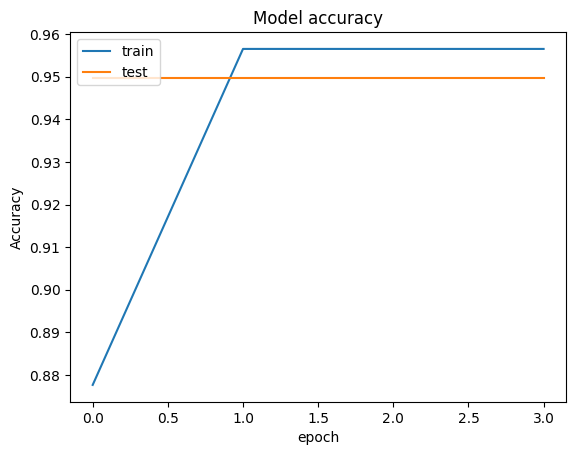

In [24]:
# Summarizing history of accuracy
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.title("Model accuracy")
plt.legend(['train','test'],loc='upper left')
plt.show()

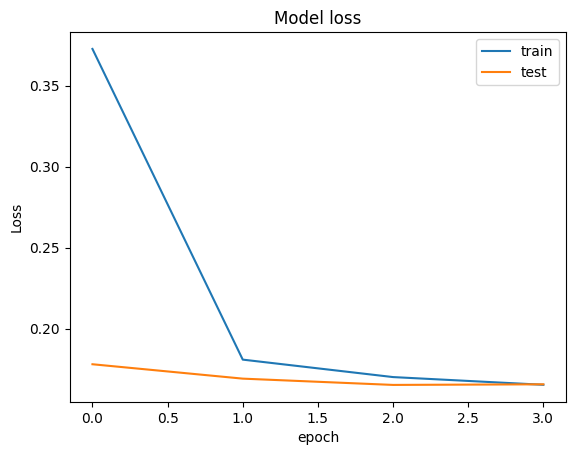

In [25]:
# Summarizing history of loss 
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper right')
plt.show()

# Making the predictions and evaluating the model


In [26]:
# Predicting the test set results
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)  #if sigmoid gives value greater than 0.5 it will be considered as one ,otherwise 0

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [27]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[960,   0],
       [ 62,   0]], dtype=int64)

In [28]:
# Calculating the testing accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.9393346379647749

In [29]:
# get the weights assigned to inputs
model.get_weights()

[array([[ 0.24462101,  0.13033438, -0.31780088,  0.19766118, -0.5274131 ,
         -0.01227313,  0.4077244 , -0.46854323, -0.06289667,  0.42102954],
        [-0.8986619 , -0.35818824,  0.29100436,  0.00581883,  0.62244415,
         -0.00954331, -1.128899  , -0.7305005 ,  0.31295332, -0.57166594],
        [-0.5932917 ,  0.19499698,  0.29110044, -0.26012352,  0.61556864,
         -0.68978506, -0.5402043 , -0.14414252,  0.01415874, -0.5402684 ],
        [-0.21717499,  0.32215965, -0.5984901 , -0.13961634,  0.13617833,
         -0.59633344, -0.16958402, -0.36847717,  0.26777884,  0.31330264],
        [-0.27079463,  0.16424914, -0.3911564 , -0.35661212,  0.29724696,
         -0.17260137,  0.04133807, -0.46490592, -0.41315353,  0.5340168 ],
        [ 0.13732743,  0.06066093, -0.6669121 , -0.5696311 ,  0.12454469,
          0.18225938, -0.0447683 , -0.25835642, -0.6493996 , -0.580935  ],
        [ 0.1277495 ,  0.40585542, -0.30056787, -0.03347646, -0.29630795,
         -0.02933905, -0.3446676

# Acheived training accuracy of 95.83 %
# Acheived validation accuracy of 94.96 %
# Acheived testing accuracy of 93.93 or 94%

In [31]:
# Saving the model
from tensorflow.keras.models import load_model
model.save("Stroke_prediction_model.h5")

"from tensorflow.keras.models import load_model
     model.save("Stroke_prediction_model.h5")"